# Lista de Exercícios 03 - Iago O. Lima - Eng. de Computação - 374851

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Perceptron

In [52]:
class Perceptron(object):
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.

    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    errors_ : list
      Number of misclassifications (updates) in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
          Training vectors, where n_samples is the number of samples and
          n_features is the number of features.
        y : array-like, shape = [n_samples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

### Adaline

In [53]:
class AdalineGD(object):
    """ADAptive LInear NEuron classifier.
    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.
    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    cost_ : list
      Sum-of-squares cost function value in each epoch.
    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """ Fit training data.
        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
          Training vectors, where n_samples is the number of samples and
          n_features is the number of features.
        y : array-like, shape = [n_samples]
          Target values.
        Returns
        -------
        self : object
        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            # Please note that the "activation" method has no effect
            # in the code since it is simply an identity function. We
            # could write `output = self.net_input(X)` directly instead.
            # The purpose of the activation is more conceptual, i.e.,  
            # in the case of logistic regression (as we will see later), 
            # we could change it to
            # a sigmoid function to implement a logistic regression classifier.
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Compute linear activation"""
        return X

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

### Carregando dataset e definindo colunas

In [54]:
features = ['sepal_length','sepal_width','petal_length',
           'petal_width','type']
data = pd.read_csv('iris.csv',names=features)

### Utilizando somente as classes Setosa e Virgínica

In [55]:
data = data[ (data['type'] == 'Iris-setosa') | (data['type'] == 'Iris-versicolor') ]

### Analisando Dados

In [56]:
data.head(50)

sepal_length  sepal_width  petal_length  petal_width         type
0            5.1          3.5           1.4          0.2  Iris-setosa
1            4.9          3.0           1.4          0.2  Iris-setosa
2            4.7          3.2           1.3          0.2  Iris-setosa
3            4.6          3.1           1.5          0.2  Iris-setosa
4            5.0          3.6           1.4          0.2  Iris-setosa
5            5.4          3.9           1.7          0.4  Iris-setosa
6            4.6          3.4           1.4          0.3  Iris-setosa
7            5.0          3.4           1.5          0.2  Iris-setosa
8            4.4          2.9           1.4          0.2  Iris-setosa
9            4.9          3.1           1.5          0.1  Iris-setosa
10           5.4          3.7           1.5          0.2  Iris-setosa
11           4.8          3.4           1.6          0.2  Iris-setosa
12           4.8          3.0           1.4          0.1  Iris-setosa
13           4.3          3.0           1.1          0.1  Iris-setosa
14           5.8          4.0           1.2          0.2  Iris-setosa
15           5.7          4.4           1.5          0.4  Iris-setosa
16           5.4          3.9           1.3          0.4  Iris-setosa
17           5.1          3.5           1.4          0.3  Iris-setosa
18           5.7          3.8           1.7          0.3  Iris-setosa
19           5.1          3.8           1.5          0.3  Iris-setosa
20           5.4          3.4           1.7          0.2  Iris-setosa
21           5.1          3.7           1.5          0.4  Iris-setosa
22           4.6          3.6           1.0          0.2  Iris-setosa
23           5.1          3.3           1.7          0.5  Iris-setosa
24           4.8          3.4           1.9          0.2  Iris-setosa
25           5.0          3.0           1.6          0.2  Iris-setosa
26           5.0          3.4           1.6          0.4  Iris-setosa
27           5.2          3.5           1.5          0.2  Iris-setosa
28           5.2          3.4           1.4          0.2  Iris-setosa
29           4.7          3.2           1.6          0.2  Iris-setosa
30           4.8          3.1           1.6          0.2  Iris-setosa
31           5.4          3.4           1.5          0.4  Iris-setosa
32           5.2          4.1           1.5          0.1  Iris-setosa
33           5.5          4.2           1.4          0.2  Iris-setosa
34           4.9          3.1           1.5          0.1  Iris-setosa
35           5.0          3.2           1.2          0.2  Iris-setosa
36           5.5          3.5           1.3          0.2  Iris-setosa
37           4.9          3.1           1.5          0.1  Iris-setosa
38           4.4          3.0           1.3          0.2  Iris-setosa
39           5.1          3.4           1.5          0.2  Iris-setosa
40           5.0          3.5           1.3          0.3  Iris-setosa
41           4.5          2.3           1.3          0.3  Iris-setosa
42           4.4          3.2           1.3          0.2  Iris-setosa
43           5.0          3.5           1.6          0.6  Iris-setosa
44           5.1          3.8           1.9          0.4  Iris-setosa
45           4.8          3.0           1.4          0.3  Iris-setosa
46           5.1          3.8           1.6          0.2  Iris-setosa
47           4.6          3.2           1.4          0.2  Iris-setosa
48           5.3          3.7           1.5          0.2  Iris-setosa
49           5.0          3.3           1.4          0.2  Iris-setosa

In [57]:
data.describe()

sepal_length  sepal_width  petal_length  petal_width
count    100.000000   100.000000    100.000000   100.000000
mean       5.471000     3.094000      2.862000     0.785000
std        0.641698     0.476057      1.448565     0.566288
min        4.300000     2.000000      1.000000     0.100000
25%        5.000000     2.800000      1.500000     0.200000
50%        5.400000     3.050000      2.450000     0.800000
75%        5.900000     3.400000      4.325000     1.300000
max        7.000000     4.400000      5.100000     1.800000

In [58]:
data['type'].value_counts()

Iris-versicolor    50
Iris-setosa        50
Name: type, dtype: int64

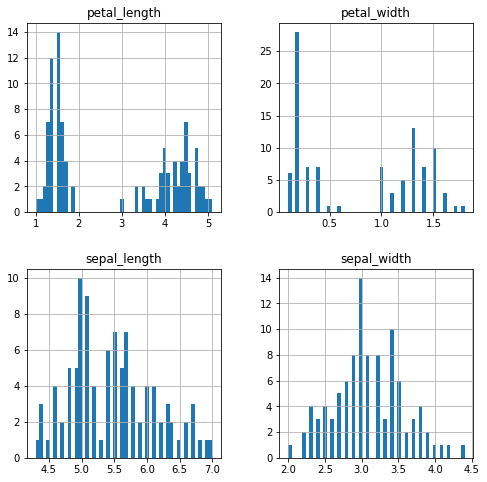

In [59]:
data.hist(bins=50, figsize=(8,8));

In [60]:
data['type'] = np.where(data['type'] == 'Iris-setosa', 1, -1)

In [61]:
dataset = data.values[:100,:]
np.random.seed(1)
np.random.shuffle(dataset)
#dataset

In [62]:
X = dataset[:,:-1]
y = dataset[:,-1]

In [63]:
X[:5]

array([[5.5, 2.4, 3.8, 1.1],
       [5.4, 3. , 4.5, 1.5],
       [5.5, 4.2, 1.4, 0.2],
       [5.5, 2.4, 3.7, 1. ],
       [5. , 2.3, 3.3, 1. ]])

In [64]:
y[:5]


array([-1., -1.,  1., -1., -1.])

In [65]:
n_train = int(round(len(y) * 0.05))
X_train = X[:n_train,:]
y_train = y[:n_train]
X_test = X[n_train:,:]
y_test = y[n_train:]

In [66]:
X.shape, y.shape, X_train.shape, y_train.shape, X_test.shape, y_test.shape

((100, 4), (100,), (5, 4), (5,), (95, 4), (95,))

In [67]:
np.average(X_train), np.average(y_train)

(3.1350000000000007, -0.6)

In [68]:
np.average(X_test), np.average(y_test)

(3.0486842105263157, 0.031578947368421054)

### Criação do modelo Perceptron e avaliação da métrica acurácia - Hyperparâmetro 1

In [69]:
model = Perceptron(eta=0.00001, n_iter=20)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = sum(y_pred == y_test) / y_test.shape[0]
accuracy

0.4842105263157895

### Criação do modelo Perceptron e avaliação da métrica acurácia - Hyperparâmetro 2

In [70]:
model = Perceptron(eta=0.007, n_iter=15)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = sum(y_pred == y_test) / y_test.shape[0]
accuracy

0.5473684210526316

### Criação do modelo Perceptron e avaliação da métrica acurácia - Hyperparâmetro 3

In [71]:
model = Perceptron(eta=0.05, n_iter=10)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = sum(y_pred == y_test) / y_test.shape[0]
accuracy

1.0

### Criação do modelo Adaline e avaliação da métrica acurácia - Hyperparâmetro 1

In [72]:
model = AdalineGD(eta=0.00001, n_iter=20)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = sum(y_pred == y_test) / y_test.shape[0]
accuracy

0.4842105263157895

### Criação do modelo Adaline e avaliação da métrica acurácia - Hyperparâmetro 2

In [73]:
model = AdalineGD(eta=0.007, n_iter=15)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = sum(y_pred == y_test) / y_test.shape[0]
accuracy

0.9789473684210527

### Criação do modelo Adaline e avaliação da métrica acurácia - Hyperparâmetro 3

In [74]:
model = AdalineGD(eta=0.05, n_iter=10)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = sum(y_pred == y_test) / y_test.shape[0]
accuracy

0.5157894736842106